<center>

# Simple Perceptron Classifier. Rosenblat's Perceptron.

<center>



#####  Прежде чем реализовывать модель, вы должны понимать, какие методы дадут наибольший прирост в скорости вычислений во время выполнения операций над векторами/матрицами (пока рассматриваем вычисления только на CPU).

-----
В Python мы можем реализовывать вычисления при помощи:

1. For/While loop
2. Comprehensions
3. NumPy Operations (3rd party package)
-----


### For Loop

In [21]:
x_0, x_1, x_2 = 0.75, 1.2, 3.22
bias, w1, w2 = 0.001, 0.3, 0.0002

X = [x_0, x_1, x_2]
W = [bias, w1, w2]

z = 0.

for i in range(len(X)):
    z += X[i] * W[i]

print(round(z,4))

0.3614


### List Comprehensions

In [22]:
z = sum(x_i*w_i for x_i, w_i in zip(X,W))
print(round(z,4))

0.3614


### NumPy (векторизированные вычисления)

In [23]:
import numpy as np
from timeit import timeit

x_vec, w_vec = np.array(X), np.array(W)
z = (x_vec.transpose()).dot(w_vec)
print(round(z, 4))

0.3614


### Какой метод будет самым быстрым?

In [24]:
def looping(x, w):
    z = 0.
    for i in range(len(x)):
        z += x[i]*w[i]
    return round(z, 4)


def comprehensioned(x, w):
    return round(sum(x_i*w_i for x_i, w_i in zip(x, w)), 4)


def vectorized(x: np.ndarray, w: np.ndarray):
    return x.dot(w)

In [25]:
x, w = np.random.rand(100_000), np.random.rand(100_000)

In [26]:
%timeit -r 100 -n 10 looping(x,w)

40.9 ms ± 4.01 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [27]:
%timeit -r 100 -n 10 comprehensioned(x,w)

28.6 ms ± 314 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [28]:
%timeit -r 100 -n 10 vectorized(x,w)

The slowest run took 30.44 times longer than the fastest. This could mean that an intermediate result is being cached.
10.9 µs ± 18 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


# Реализация примитивной модели Perceptron'a

Согласно логике работы персептрона, попробуйте реализовать класс `SimplePerceptronClassifier()` и расписать логику обучения модели простого персептрона (предка первой нейронной сети).

Помощь:

1. При инициализации алгоритма (вашего объекта) алгоритм должен знать следующие параметры:
    a) learning rate (eta, lr) диапазон которого должен быть от 0.0 до 1.0
    b) количество итераций при обучении (эпох, epochs) - целочисленная переменная
    c) random state для воспроизводимости эксперимента с обучением модели

   ```Итого ваш конструктор класса должен иметь 3 соответствующих аргумента.```

<br>

2. Реализуйте метод fit который принимает 2 аргумента - матрицу признаков Х и вектор реальных значений целевой переменной у.
   В данном методе у вас должна быть прописана логика инициализации случайного генератора числе (```random_generator = np.random.RandomState```) и инициализация матрицы (вектора) весов W с соответствующими нормально распределенными элементами в диапазоне от 0.00 до 0.01. Необходимо реализовать вектор (скаляр) случайных ошибок b. Далее необходимо реализовать логику обучения персептрона, которая была представленна на лекции. Слайд логика работы алгоритма.

<br>

3. Реализуйте метод net_input (линейная комбинация Х и b + случайная ошибка). Данный метод будет участвовать в методе predict().

<br>

4. Реализуйте метод predict() который будет выводить принадлежность к определенному классу согласно прописанной логике алгоритма, представленной на слайде.



In [29]:
import numpy as np

class SimplePerceptronClassifier(object):
    """
    Simple Perceptron Classifier.

    Parameters:
        lr: float
            Learning rate (range between 0.0 and 1.0).
        epochs: int
            Number of passes through training sample.
        random_state: int
            Random number pseudo generator for random weight initialization.

    Attributes:
        w_ : 1d ndarray
            Weights after training epoch
        b_: Scalar value
            Bias after training epoch
        errors_ : list
            Number of missclassified samples for each epoch (iteration)
    """
    def __init__(self, lr=0.01, epochs=50, random_state=42):
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y):
        """
        Training function for X - feature array and y - array of binary classes.
        :param X: {array-like}, shape = [n_rows, n_cols]
            Training vectors, where n_rows is the number of observations in the sample
            and n_cols is the number of features in the sample (e.g. height, weight and etc.)
        :param y: array-like, shape = [n_rows]
            Target variable with real classes (labels)
        :return: self.object
        """
        random_generator = np.random.RandomState(self.random_state)
        self.w_ = random_generator.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0.0
            for x_i, label in zip(X, y):
                update = self.lr * (label - self.predict(x_i))
                self.w_ += update * x_i
                self.b_ += update
                errors += int(update != 0.0)
            print("Epoch {}: \nError: {}\n".format(_, float(errors)))
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)


### Посмотрим на работу алгоритма

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Sometimes there is an error with web certificates (just update them)
# https://stackoverflow.com/questions/27835619/urllib-and-ssl-certificate-verify-failed-error
# /Applications/Python\ 3.10/Install\ Certificates.command

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None, encoding="utf-8")
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


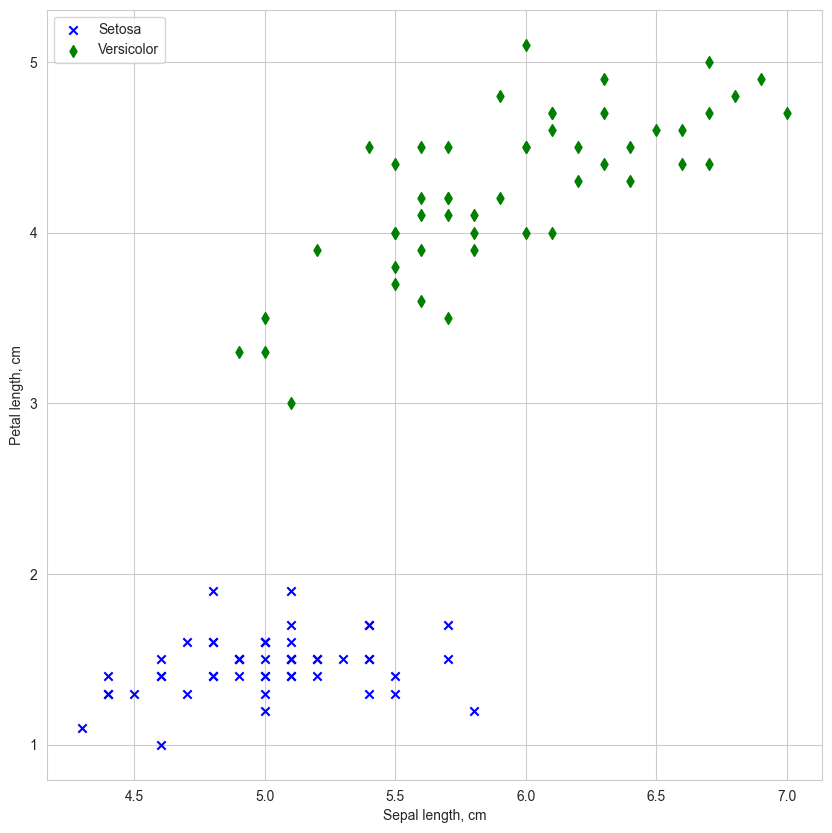

In [31]:
y = df.iloc[0:100, 4].values

y = np.where(y == "Iris-setosa", 0, 1)

X = df.iloc[0:100, [0, 2]].values

plt.figure(figsize=(10, 10))
plt.scatter(X[:50, 0], X[:50, 1], color="blue", marker="x", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="green", marker="d", label="Versicolor")
plt.xlabel("Sepal length, cm")
plt.ylabel("Petal length, cm")
plt.legend(loc="upper left")
plt.show();

In [32]:
perceptron_classifier_instance = SimplePerceptronClassifier(lr=0.01, epochs=20)
perceptron_classifier_instance.fit(X, y)

Epoch 0: 
Error: 2.0

Epoch 1: 
Error: 2.0

Epoch 2: 
Error: 3.0

Epoch 3: 
Error: 2.0

Epoch 4: 
Error: 1.0

Epoch 5: 
Error: 0.0

Epoch 6: 
Error: 0.0

Epoch 7: 
Error: 0.0

Epoch 8: 
Error: 0.0

Epoch 9: 
Error: 0.0

Epoch 10: 
Error: 0.0

Epoch 11: 
Error: 0.0

Epoch 12: 
Error: 0.0

Epoch 13: 
Error: 0.0

Epoch 14: 
Error: 0.0

Epoch 15: 
Error: 0.0

Epoch 16: 
Error: 0.0

Epoch 17: 
Error: 0.0

Epoch 18: 
Error: 0.0

Epoch 19: 
Error: 0.0



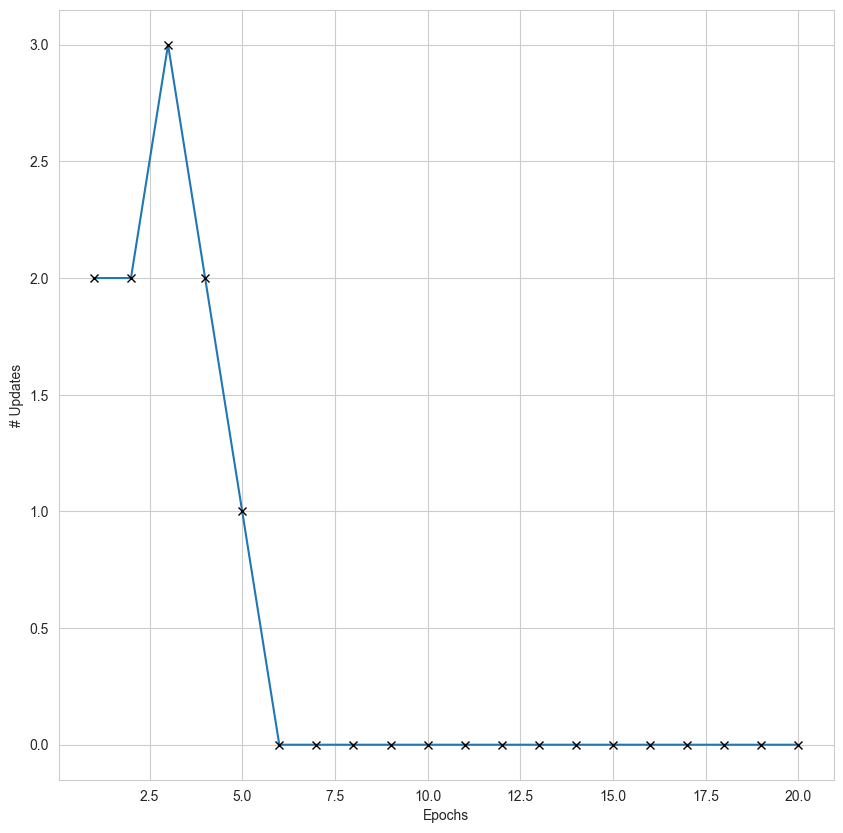

In [33]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, len(perceptron_classifier_instance.errors_) + 1), perceptron_classifier_instance.errors_, marker="x", mfc="red", mec="k")
plt.xlabel("Epochs")
plt.ylabel("# Updates")
plt.show();

In [34]:
def plot_decision_boundary(X, y, classifier, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ("red", "green", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x_1_minima, x_1_maxima = X[:, 0].min() - 1, X[:, 0].max() + 1
    x_2_minima, x_2_maxima = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx_1, xx_2 = np.meshgrid(np.arange(x_1_minima, x_1_maxima, resolution), np.arange(x_2_minima, x_2_maxima, resolution))
    regions = perceptron_classifier_instance.predict(np.array([xx_1.ravel(), xx_2.ravel()]).T)
    regions = regions.reshape(xx_1.shape)
    plt.contourf(xx_1, xx_2, regions, alpha=0.3, cmap=cmap)
    plt.xlim(xx_1.min(), xx_1.max())
    plt.ylim(xx_2.min(), xx_2.max())

    for i, label in enumerate(np.unique(y)):
        plt.scatter(x=X[y == label, 0], y=X[y == label, 1], alpha=0.8, c=colors[i], marker=markers[i], label=f'Класс {label}', edgecolor='black')

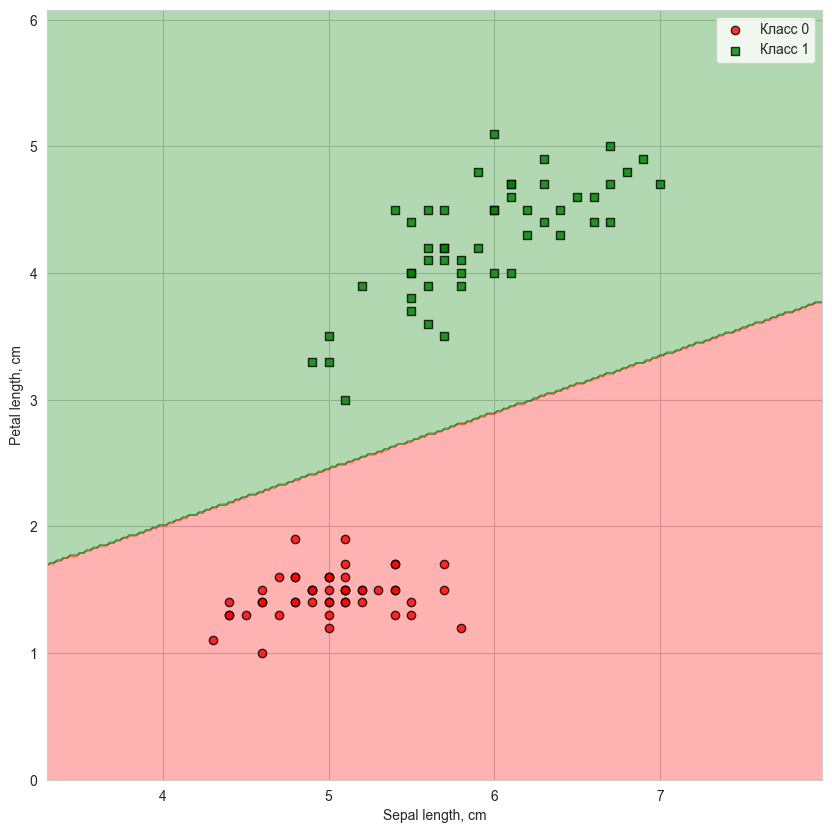

In [35]:
plt.figure(figsize=(10, 10))
plot_decision_boundary(X, y, classifier=perceptron_classifier_instance)
plt.xlabel("Sepal length, cm")
plt.ylabel("Petal length, cm")
plt.legend(loc="best")
plt.show();